# Project: Determinants for Predicting Show Ups - [NoShowAppointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this project, I will be performing analysis on a dataset about the information of over 100 thousand patients who has medical appointment, collected from a hospital in Brazil. In the dataset, it is interesting we find the following information about each patient:

   -**Patient** and **Appointment ID**: Used as a means for identificitaion of each patient and appointment   
   
   -**Gender** 
   
   -**ScheduledDay**: Holding the information about the date the appointment was registered 
   
   -**AppointmentDay**: The date in which the appointment was set to hold
   
   -**Age**
    
   -**Neighborhood**:Telling us where the appointment took place
   
   -**Scholarship**: Tells us whether or not whether patient is under government financial aid. [Read more here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
   
   -**Hipertension**: Tells us whether or not the patient is hypertensive
   
   -**Alcoholism**: Whether or not the patient is an alcohol addict
   
   -**Handicap**:Tells whether patient has any disability
   
   -**SMS_received**: Tells how many times messages off reminders were sent
   
   -**No-show**:Tells whether patient showed up or not. (Worthful of note that the column says *No* if patient showed up and *Yes* if patient doesn't.)
   
>Specifically, I will be interested in fishing out the from the variables, the factors that  contribute to patients  showing up for their scheduled appointments, either positively or negatively. In turn, this will help to enhance predictions of the set of patients who are most likely to show up


### Question(s) for Analysis
>The center question I am focusing on is; "What factors are important for us to know inorder to correctly predict if a patient will show up for their scheduled appointment?" This question will further bring rise to the following questions:

-Do the reminders possibly affect the chance of showing up?

-How about neighborhoods, are there more show-ups in some neighborhoods compared to the others?

-Does having underlying diseases (diabetes and hypertension) increases the patient chances showing up for their appointment?

-What role does gender plays in registering and showing up for appointments?

-What role does age plays in attitude towards appointments? 

In [1]:
#importing packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> To begin with, we are inspecting and assessing the data set, so that we can understand and perhaps figure out any changes we need to make. We will also make some adjustment on the dataset where necessary, to ensure the dataset is in its best state to perfirm analysis on.


### General Properties


In [2]:
#loading the data and displaying its first few lines
noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
noshow_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#inspecting the dataset info
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>It is quite obvious here we have no missing values in the dataset

In [4]:
#checking for duplicate entries
noshow_df.duplicated().any()

False

>The false statement above tells us there are no duplicates. 

In [5]:
#checking for the statistical descriptions
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 >Checking through this description reveals some abnoramlities, such as the maximum age (115) being outrageously larger than the mean age (37) and is potentially an outlier, minimum age being (1) and maximum value of handicap being 4.


### Data Cleaning
>We can see from the assessment above that the dataset is almost clean, as it has no missing values and duplicates. However, we can notice some abnoramlities when we check on its descriptions, such as the potential age outlier, the age also having a negaitve value (-1), and also the handicap column we found a value other than 0 or 1 (which indicates True or False). These abnormalities needs to be worked on, perhaps checking the number of entries with these values, and dropping them if their count is negligible. 
 

Text(0,0.5,'Age distibution')

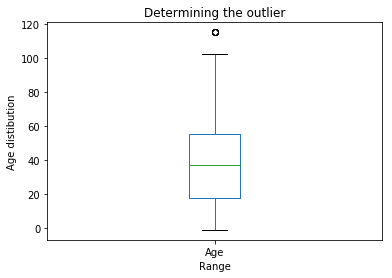

In [6]:
#determining the outlier
ax = noshow_df['Age'].plot(kind='box', title='Determining the outlier');
ax.set_xlabel('Range')
ax.set_ylabel('Age distibution')

>It is clearly shown here that the outliers here are numbers greater than 100. It is necessary to check for them, and decide wether to drop them, if they are negligible.

Text(0,0.5,'Number of patients')

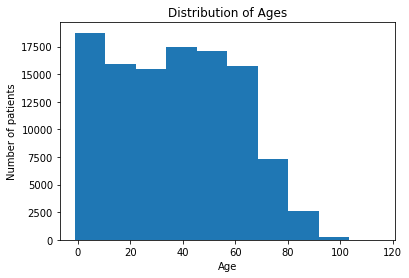

In [7]:
#plotting an histogram for age to check for their counts
ax = noshow_df['Age'].plot(kind="hist", title='Distribution of Ages');
ax.set_xlabel('Age')
ax.set_ylabel('Number of patients')

>From the histogram above, ages greater than 100 looks quite small and negligible

In [8]:
#checking for outliers in the dataset
noshow_df[noshow_df['Age'] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [9]:
#dropping the outliers
noshow_df.drop(index=noshow_df[noshow_df['Age'] > 100].index, inplace=True)

In [10]:
#findng out which row has negative value age
noshow_df[noshow_df['Age'] < 0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Above we can see the patient with abnormal age is only one, so it is quite safe to drop it.

In [11]:
noshow_df.drop(index=99832, inplace=True)

In [12]:
#checking for abnormal handicap value
array1 = np.array(noshow_df['Handcap'])
checker = np.logical_or(array1<0, array1>1)
noshow_df[checker]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
2213,3.423831e+09,5640766,F,2016-04-29T11:22:50Z,2016-04-29T00:00:00Z,29,VILA RUBIM,0,0,0,0,2,0,No
2214,2.754718e+12,5640760,M,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,No
2673,4.415275e+13,5589893,M,2016-04-15T13:06:05Z,2016-04-29T00:00:00Z,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,1.647280e+12,5647342,M,2016-05-02T13:24:36Z,2016-05-04T00:00:00Z,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,4.555225e+12,5689883,F,2016-05-12T09:10:28Z,2016-05-16T00:00:00Z,10,BENTO FERREIRA,0,0,0,0,2,0,No


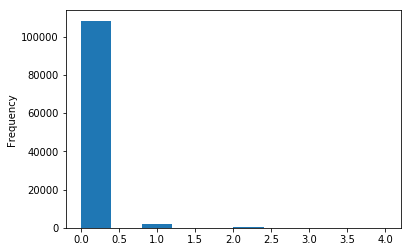

In [13]:
#plotting a histogram of handicap to check for the significance of the abnormal values
noshow_df['Handcap'].plot(kind='hist')

It is quite obvious from above that the abnormal values are safe to drop.

In [14]:
#dropping abnormal values
noshow_df.drop(index=noshow_df[noshow_df['Handcap']>1].index, inplace=True)

By now, we've made proper cleaning to our data, we can den recheck its information and descriptions to confirm we are all set for analysis

In [15]:
#checking for info
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110320 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110320 non-null float64
AppointmentID     110320 non-null int64
Gender            110320 non-null object
ScheduledDay      110320 non-null object
AppointmentDay    110320 non-null object
Age               110320 non-null int64
Neighbourhood     110320 non-null object
Scholarship       110320 non-null int64
Hipertension      110320 non-null int64
Diabetes          110320 non-null int64
Alcoholism        110320 non-null int64
Handcap           110320 non-null int64
SMS_received      110320 non-null int64
No-show           110320 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


We now have 110322 entries remaining, a difference of 205 from the initial dataset. The difference is also negligible.

In [16]:
#checking for discription
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103200e+05,1.103200e+05,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000
mean,1.475170e+14,5.675297e+06,37.066044,0.098287,0.196836,0.071610,0.030384,0.018474,0.321193
std,2.561271e+14,7.129939e+04,23.091170,0.297703,0.397609,0.257842,0.171643,0.134657,0.466937
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174318e+12,5.640276e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174698e+13,5.680566e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> With the data cleaned and all set, it is now time to use computations and visualizatuions to unravel the mysteries behind our questions, and make better findings.

### Do reminders possibly affect the chances of showing up?

In [17]:
#a number of comparing of value counts will be done, setting a function for it to avoid code repititions
def compare_val(df, Column):
    return df[Column].value_counts()

In [18]:
#comparing those who received sms to those who didn't
compare = compare_val(noshow_df, 'SMS_received')
print(compare)

0    74886
1    35434
Name: SMS_received, dtype: int64


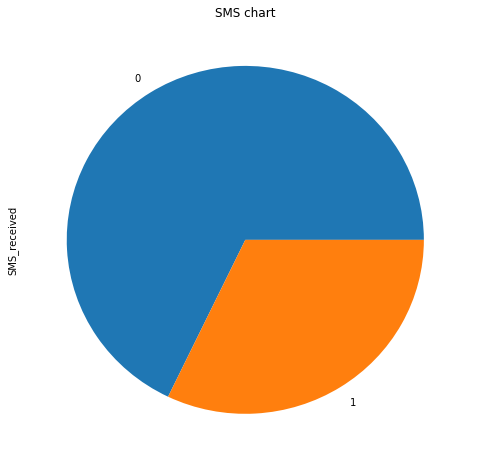

In [19]:
compare.plot(kind='pie', figsize=(8,8), title='SMS chart');

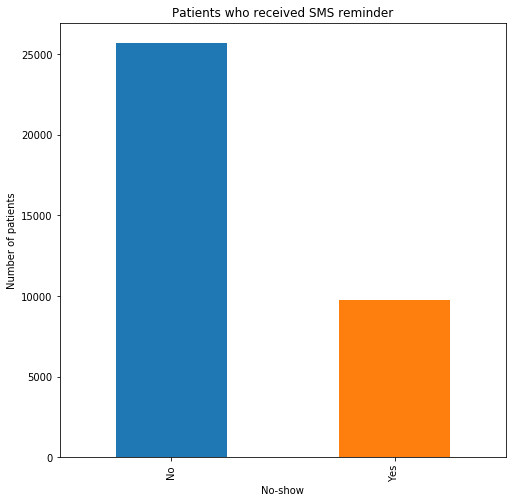

In [20]:
#comparing n-shows with SMS_received, there is also a need to create set_labels function to reduce reptitions
def set_labels(ax, xlabel, ylabel):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

shows = noshow_df[noshow_df['SMS_received']==1]
ax = compare_val(shows,'No-show').plot(kind='bar', figsize=(8,8), title='Patients who received SMS reminder')
set_labels(ax, 'No-show', 'Number of patients')

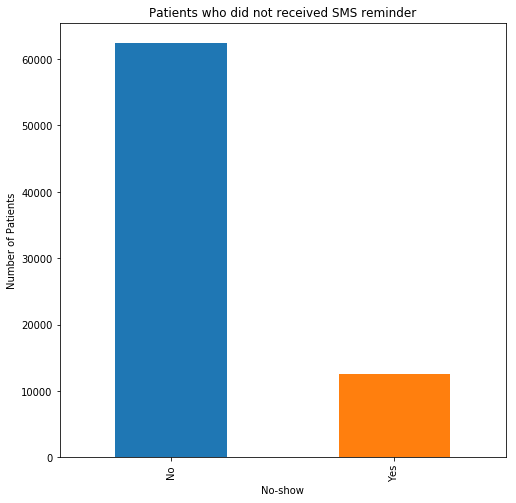

In [21]:
#checking for patients who did not received any message
noshows = noshow_df[noshow_df['SMS_received']==0]
ax = compare_val(noshows,'No-show').plot(kind='bar', figsize=(8,8), title='Patients who did not received SMS reminder')
set_labels(ax, 'No-show', 'Number of Patients')

>From the analyses above, we can notice that those who were not sent reminder SMS are much more than those who were sent SMS. Also, those who are sent SMS and showed up are much more than those who were sent SMS and didn't showed up. Lastly, those who are not sent SMS despite not being reminded, appears to have more number of show-ups than those who were reminded, and also those who show up and not sent SMS are much more than those who didn't show up and not sent SMS.

### Are there more show ups in some neighborhood compared to others?

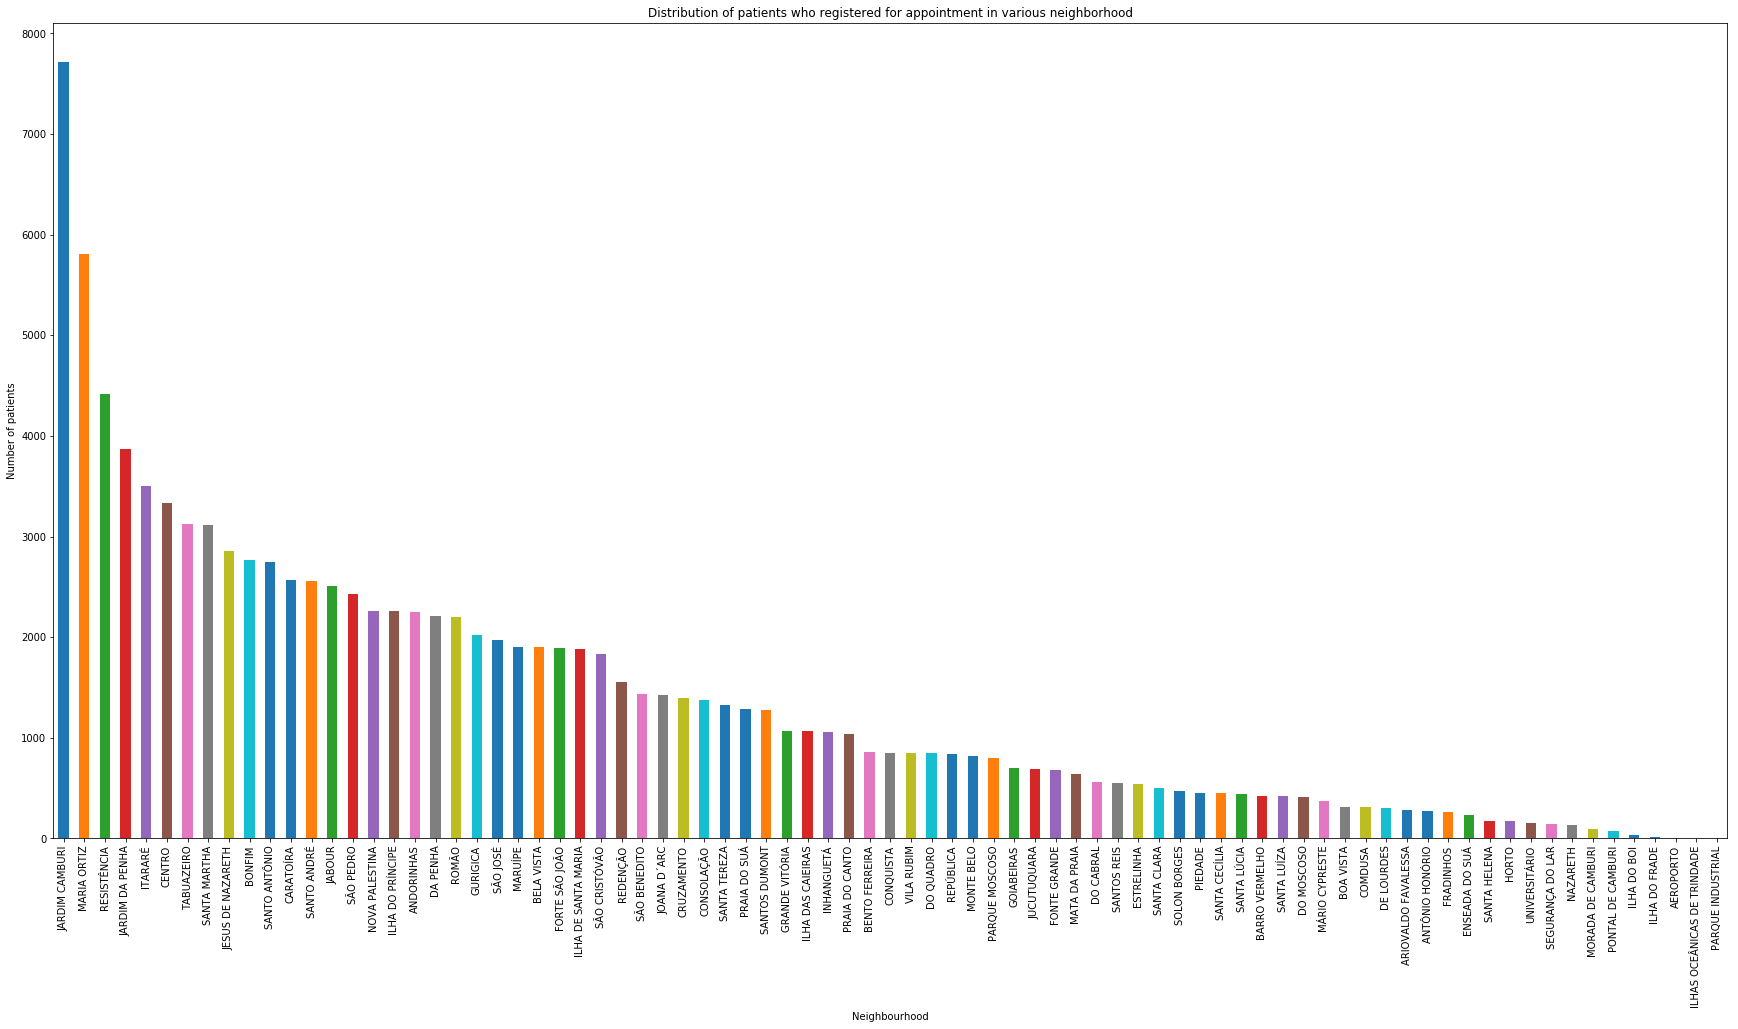

In [22]:
#comparing the number of patients in each neighborhood
compare2 = compare_val(noshow_df, 'Neighbourhood')
distribution1 = compare2.to_frame()
ax = compare2.plot(kind='bar', figsize=(30,15),  title='Distribution of patients who registered for appointment in various neighborhood')
set_labels(ax, 'Neighbourhood', 'Number of patients')

In [23]:
#checking for patients who showed up in various neighborhood
shows_n = noshow_df[noshow_df['No-show']=='No']
compare3 = compare_val(shows_n, 'Neighbourhood')
distribution2 = compare3.to_frame()

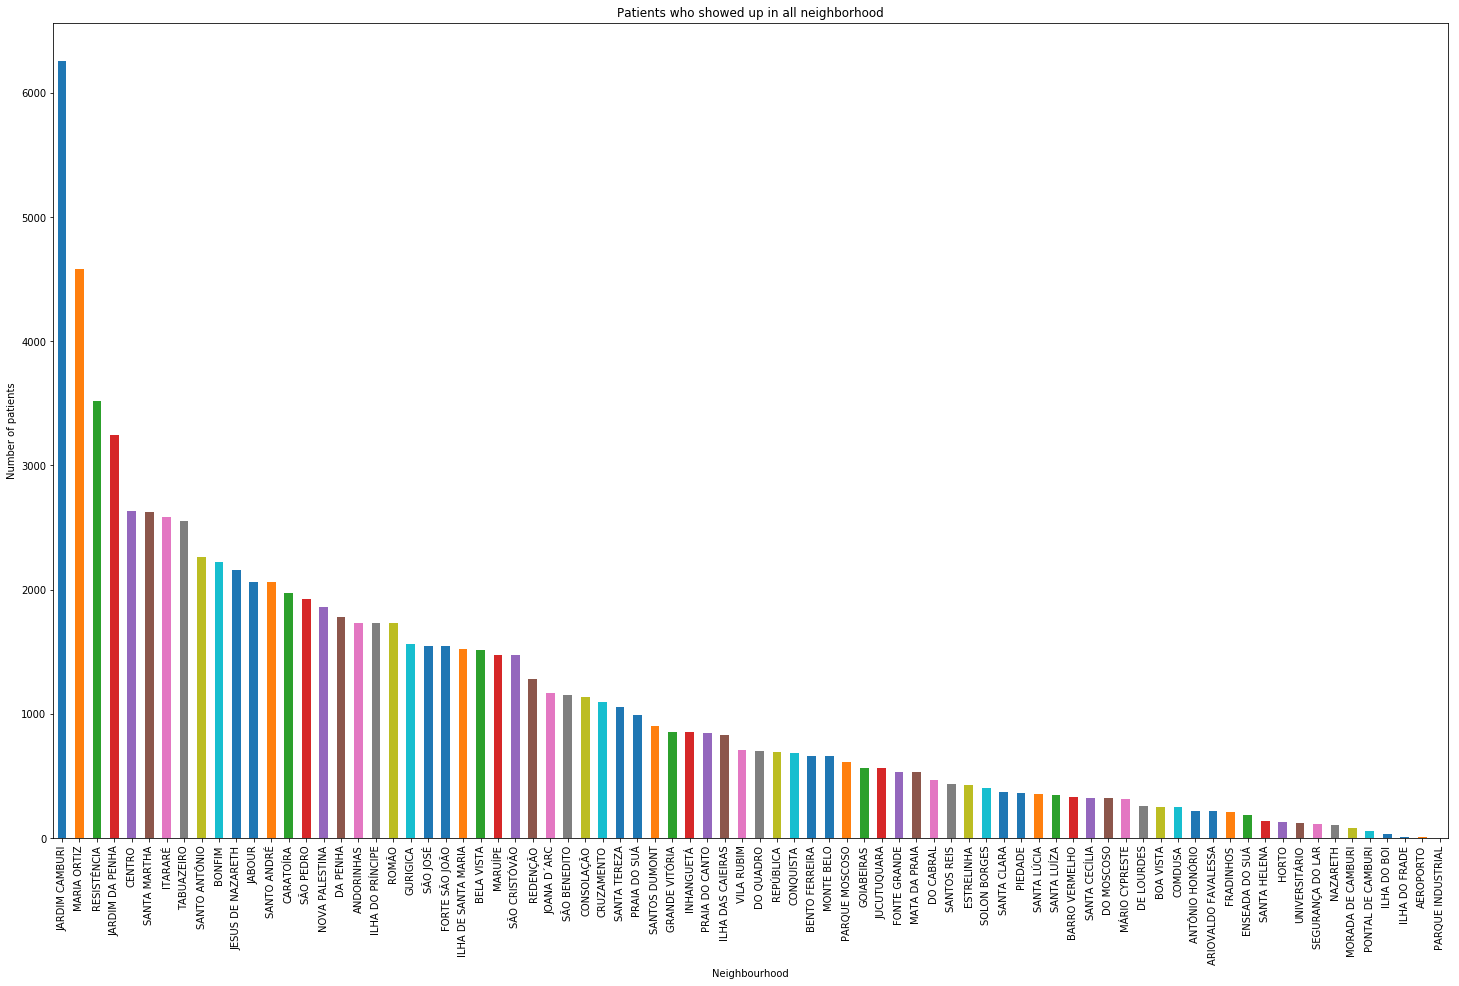

In [24]:
ax = compare3.plot(kind='bar', figsize=(25,15), title='Patients who showed up in all neighborhood')
set_labels(ax, 'Neighbourhood', 'Number of patients')

In [25]:
#checking for the correlation between patients who registered for the appointment and patients who finally showed in each neighborhood
new_df = pd.concat([distribution1, distribution2], axis=1, ignore_index=True, sort=True)
new_df

,0,1
AEROPORTO,8,7.0
ANDORINHAS,2251,1734.0
ANTÔNIO HONÓRIO,271,221.0
ARIOVALDO FAVALESSA,282,220.0
BARRO VERMELHO,423,332.0
BELA VISTA,1899,1515.0
BENTO FERREIRA,855,662.0
BOA VISTA,312,254.0
BONFIM,2770,2221.0
CARATOÍRA,2564,1974.0


In [26]:
new_df.columns = ['Registered', 'Showed-Up' ]
new_df.index.name = 'Neighbourhood'
new_df

,Registered,Showed-Up
Neighbourhood,,
AEROPORTO,8,7.0
ANDORINHAS,2251,1734.0
ANTÔNIO HONÓRIO,271,221.0
ARIOVALDO FAVALESSA,282,220.0
BARRO VERMELHO,423,332.0
BELA VISTA,1899,1515.0
BENTO FERREIRA,855,662.0
BOA VISTA,312,254.0
BONFIM,2770,2221.0


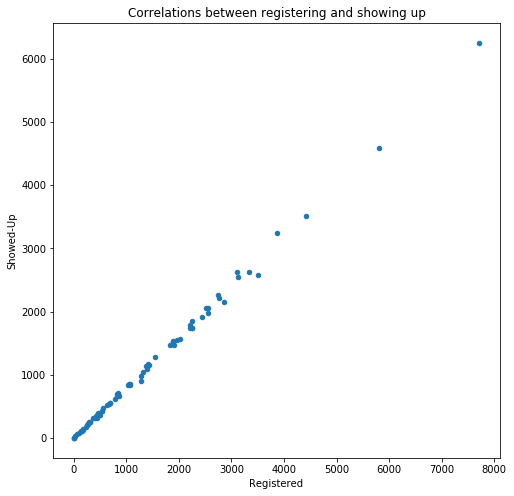

In [27]:
ax = new_df.plot(x=0, y=1, kind='scatter', figsize=(8,8), title='Correlations between registering and showing up')

From the analyses above, it is quite evident from the two bar charts above, that more patients registered in and showed up in some neighbourhood than the others. Also from the scatter plots, there is a strong positive correlations between number of registrations and number of show-ups.

### How does alcoholism affect hypertension and diabetes

In [28]:
 #comapring those who are alcoholic and have either diabetes or hypertension
alcoholic = noshow_df[noshow_df['Alcoholism']==1]
non_alcoholic = noshow_df[noshow_df['Alcoholism']==0]

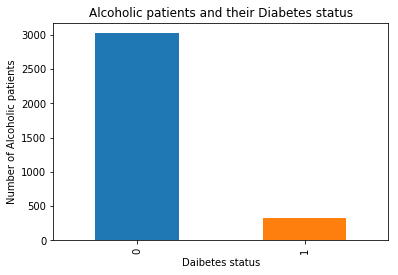

In [29]:
ax = compare_val(alcoholic, 'Diabetes').plot(kind='bar', title='Alcoholic patients and their Diabetes status')
set_labels(ax, 'Daibetes status', 'Number of Alcoholic patients')

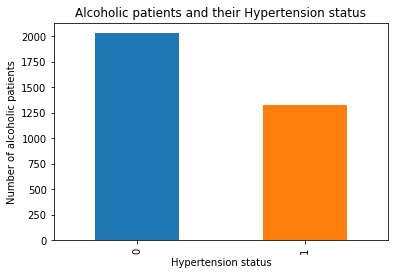

In [30]:
ax = compare_val(alcoholic, 'Hipertension').plot(kind='bar', title='Alcoholic patients and their Hypertension status')
set_labels(ax, 'Hypertension status', 'Number of alcoholic patients')

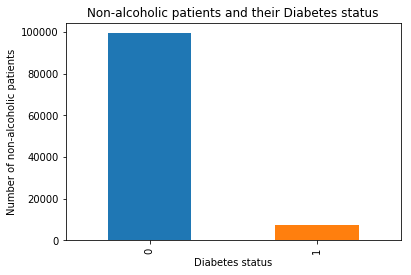

In [31]:
ax = compare_val(non_alcoholic, 'Diabetes').plot(kind='bar', title='Non-alcoholic patients and their Diabetes status')
set_labels(ax, 'Diabetes status', 'Number of non-alcoholic patients')

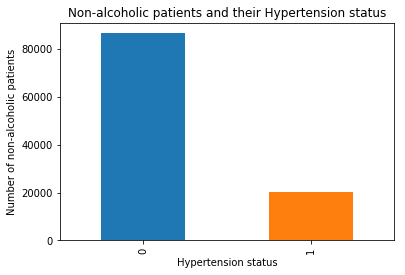

In [32]:
ax = compare_val(non_alcoholic, 'Hipertension').plot(kind='bar', title='Non-alcoholic patients and their Hypertension status')
set_labels(ax, 'Hypertension status', 'Number of non-alcoholic patients')

We can notice those who are alcoholic and has at least diabetes or hypertension are generally more than those who are not alcoholic.

### Does having underlying diseases (diabetes and hypertension) increases the patient chances showing up for their appointment?

In [33]:
array2 = np.array(noshow_df['Diabetes']==1)
array2

array([False, False, False, ..., False, False, False], dtype=bool)

In [34]:
diabetes = noshow_df[array2]
diabetes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
36,7.298459e+13,5637975,F,2016-04-29T07:35:19Z,2016-04-29T00:00:00Z,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,No
37,1.578132e+12,5637986,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
41,8.224325e+14,5633339,F,2016-04-28T09:20:36Z,2016-04-29T00:00:00Z,71,MARUÍPE,0,0,1,0,0,0,No
44,2.741649e+11,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
47,5.894585e+11,5633116,F,2016-04-28T08:51:26Z,2016-04-29T00:00:00Z,39,MARUÍPE,0,1,1,0,0,0,No
73,4.542132e+13,5552934,F,2016-04-06T18:12:38Z,2016-04-29T00:00:00Z,68,REPÚBLICA,0,1,1,0,0,1,No
112,9.538868e+12,5594665,F,2016-04-18T11:05:04Z,2016-04-29T00:00:00Z,59,SANTO ANTÔNIO,0,1,1,0,0,1,No
126,9.447582e+14,5633576,F,2016-04-28T09:37:22Z,2016-04-29T00:00:00Z,67,PRAIA DO SUÁ,0,0,1,0,0,0,Yes
127,4.224166e+12,5561194,M,2016-04-08T10:14:36Z,2016-04-29T00:00:00Z,42,PRAIA DO SUÁ,0,1,1,0,0,1,No


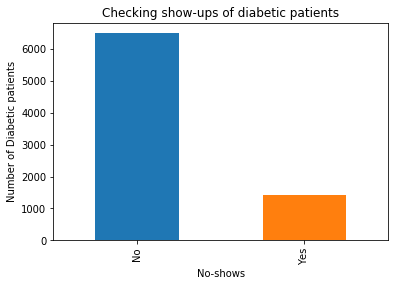

In [35]:
ax = compare_val(diabetes, 'No-show').plot(kind='bar', title='Checking show-ups of diabetic patients')
set_labels(ax, 'No-shows', 'Number of Diabetic patients')

In [36]:
array3 = np.array(noshow_df['Hipertension']==1)
array3

array([ True, False, False, ..., False, False, False], dtype=bool)

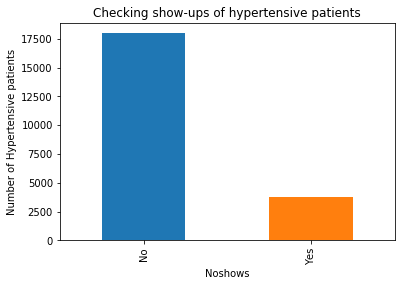

In [37]:
hipertension = noshow_df[array3]
ax = compare_val(hipertension, 'No-show').plot(kind='bar', title='Checking show-ups of hypertensive patients')
set_labels(ax, 'Noshows', 'Number of Hypertensive patients')

Great number of patients who have underlying diseases (hypertension or diabetes) appears to have a great number of show_ups.

### What role does gender plays in registering and showing up for appointments?

In [38]:
#comparing genders registration
compare4 = compare_val(noshow_df, 'Gender')
compare4

F    71723
M    38597
Name: Gender, dtype: int64

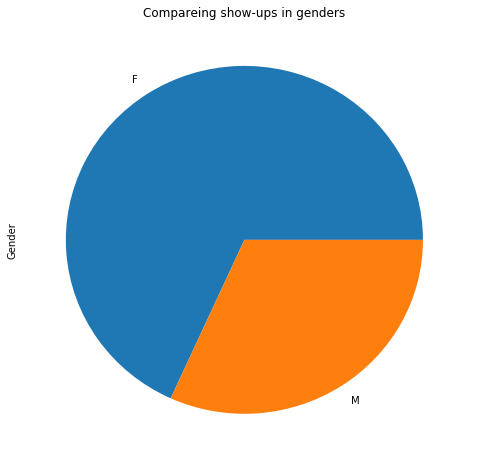

In [39]:
compare_val(shows, 'Gender').plot(kind='pie', figsize=(8,8), title='Compareing show-ups in genders')

From the analyses, it is obvious the female patients registered more and showed up much more than their male counterparts.

### What role does age plays in attitude towards appointments?

In [40]:
show_mean = shows['Age'].mean()
show_mean

37.497516509567085

In [41]:
noshow_mean = noshows['Age'].mean()
noshow_mean

36.861883396095401

From the statistics, age tends to have no effect on showing up.

<a id='conclusions'></a>
## Conclusions

From the the various analyses we have performed, the findings we have made so far is enough for us to make a number of valid conclusions as follows.
>>-Analyses to find out how SMS has affected show-ups reveals that SMS rminders does not necessarily affects/influence the number of show ups for the appointment. Although, addition of number of times the SMS were sent could be useful for more indepth analyses

>>-It appears that some neighbourhoods registered and showed up much more for appointments compared to others. Another striking observation is that, there appears to be a strong positive causation between number of registration and number of show-ups (i.e more registration in a neighbourhood more likely causes more show-ups)

>>-The patients with underlying diseases (hypertension and diabetes) tends to show-up much more than patient who doesn't.

>>-Patients who are alcoholic have higher chances of having underlying disease (diabetes/hypertension) and as such, alcohlic patients are more likely to show up.

>>-More female registered and has more show-ups compared to the male counterparts. Hence, there is a higher chance for a female to show up.

>>-The mean ages for show ups and no show ups are almost the same, telling us age does not necessarily affect show ups.


However, a limitation to this analyses is that there are some neighbourhoods which registration and turn ups are drastically low, and this analyses seems not to provide an explanation for this.
Finally, it is safe to conclude that gender, status of underlying disease (hypertension/diabetes), neighbourhood and alcoholism are very strong variables to consider when predicting show-ups of patients.